## Doc2Vec

In [1]:
### Librerias necesarias Doc2Vec

import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

### Librerias necesarias para el preprocesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

### Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.model_selection import train_test_split

### Otras librerias necesarias
import numpy as np
import pandas as pd
import re
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
Df = pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')
Df['Calificación'] = Df['Calificación'].astype(str).str.replace(',', '.').astype(float)
Df = Df.drop("Unnamed: 0", axis=1)
Df

C:\Users\Catnip\AppData\Local\Temp\ipykernel_39856\250895776.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Df = pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')


,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,"Ubicación, comodidades y limpieza",NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


In [3]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

## Dataframe positivos
# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df['Cosas Positivas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_positivo = Df[stopword_counts >= 15]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_positivo = Df_positivo[Df_positivo['Cosas Positivas'].str.split().str.len() > 30]

# Filtrar filas donde 'Calificación' sea mayor a 9
Df_positivo = Df_positivo[Df_positivo['Calificación'] > 9]


## Dataframe negativos
# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df['Cosas Negativas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_negativo = Df[stopword_counts >= 20]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_negativo = Df_negativo[
    (Df_negativo['Cosas Negativas'].str.split().str.len() > 20) &
    (Df_negativo['Cosas Negativas'].str.split().str.len() <= 70)
]

# Filtrar filas donde 'Calificación' sea menor
Df_negativo = Df_negativo[Df_negativo['Calificación'] < 7]

In [4]:
# Crear una nueva columna para identificar los comentarios como positivos
Df_positivo['Etiqueta'] = 'positivo'

# Crear una nueva columna para identificar los comentarios como negativos
Df_negativo['Etiqueta'] = 'negativo'

# Renombrar la columna de los comentarios en ambos DataFrames para que sean iguales
Df_positivo = Df_positivo.rename(columns={'Cosas Positivas': 'Comentario'})
Df_negativo = Df_negativo.rename(columns={'Cosas Negativas': 'Comentario'})

# Combinar los dos DataFrames en uno solo
Df_unificado = pd.concat([Df_positivo[['Comentario', 'Etiqueta']], Df_negativo[['Comentario', 'Etiqueta']]])

# Resetear el índice del DataFrame combinado
Df_unificado  = Df_unificado .reset_index(drop=True)

Df_unificado

,Comentario,Etiqueta
0,Fue la Mejor Opción que pudimos haber tomado e...,positivo
1,Me gusto Poder comprar los alimentos a mi gust...,positivo
2,"La calidad de personas es maravilloso, desde q...",positivo
3,La atención como me recibieron es muy buena po...,positivo
4,"El hotel es muy acogedor, está ubicado en una ...",positivo
...,...,...
10742,"Nada, no pude alojarme porque simplemente canc...",negativo
10743,Ya habíamos ido anteriormente y nos valió $150...,negativo
10744,"Publicidad engañosa, ofrecen servicios que no ...",negativo
10745,"Tv sin control remoto., baños con pisos muy pe...",negativo


In [5]:
# Dividir el dataset en entrenamiento y prueba (sin variable objetivo)
train_df, test_df = train_test_split(Df_unificado, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("Shape of X_train:", train_df.shape)
print("Shape of X_test:", test_df.shape)

train_df

Shape of X_train: (8597, 2)
Shape of X_test: (2150, 2)


,Comentario,Etiqueta
4335,Tuve una excelente experiencia. El hotel está ...,positivo
353,"El personal de lujo del hotel, Jesús, Junior f...",positivo
456,"Excelente atención, los recepcionistas te dan ...",positivo
5317,El desayuno es variado y abundante el buffet.\...,positivo
239,Estuve con mi familia y nos atendieron súper b...,positivo
...,...,...
5734,La calidad humana con la que fui acogida y tra...,positivo
5191,El desayuno es espectacular; su personal muy a...,positivo
5390,El hostal es muy agreable. Tiene areas differe...,positivo
860,"La atención de doña Gladis es espectacular, to...",positivo


In [6]:
print(type(Df_unificado))
print(Df_unificado.keys())  # Si es un diccionario, mostrará las claves disponibles

<class 'pandas.core.frame.DataFrame'>
Index(['Comentario', 'Etiqueta'], dtype='object')


In [7]:
# Verificar las dimensiones
print("Shape of train data: ", train_df.shape)
print("Shape of test data: ", test_df.shape)

# Mostrar los primeros registros del conjunto de entrenamiento
train_df.head()

Shape of train data:  (8597, 2)
Shape of test data:  (2150, 2)


,Comentario,Etiqueta
4335,Tuve una excelente experiencia. El hotel está ...,positivo
353,"El personal de lujo del hotel, Jesús, Junior f...",positivo
456,"Excelente atención, los recepcionistas te dan ...",positivo
5317,El desayuno es variado y abundante el buffet.\...,positivo
239,Estuve con mi familia y nos atendieron súper b...,positivo


In [8]:
test_df.head()

,Comentario,Etiqueta
668,"Genial el lugar, la ubicación es muy buena, un...",positivo
4874,La ubicación y la atención de todo el personal...,positivo
7410,El hotel esta deteriorado. Los baños en mal es...,negativo
8274,La habitación no cumplió con las expectativas ...,negativo
8197,La nevera sonaba como un motor de avión y esta...,negativo


## Preprocesamiento

In [9]:
########## Preprocesamiento de texto ###############

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    return text

# Aplicando la función de preprocesamiento a los datos de entrenamiento y prueba

train_df['text_pre'] = train_df['Comentario'].apply(preprocess_text)

test_df['text_pre'] = test_df['Comentario'].apply(preprocess_text)

train_df.head()

,Comentario,Etiqueta,text_pre
4335,Tuve una excelente experiencia. El hotel está ...,positivo,tuve una excelente experiencia. el hotel está ...
353,"El personal de lujo del hotel, Jesús, Junior f...",positivo,"el personal de lujo del hotel, jesús, junior f..."
456,"Excelente atención, los recepcionistas te dan ...",positivo,"excelente atención, los recepcionistas te dan ..."
5317,El desayuno es variado y abundante el buffet.\...,positivo,el desayuno es variado y abundante el buffet.\...
239,Estuve con mi familia y nos atendieron súper b...,positivo,estuve con mi familia y nos atendieron súper b...


## Modelo de clasificación de texto Doc2Vec

In [10]:
################## Entrenamiento de Word2Vec ####################

# Tokenizando el texto

train_df['text_tokens'] = train_df['text_pre'].apply(lambda x: x.split())
test_df['text_tokens'] = test_df['text_pre'].apply(lambda x: x.split())

train_df.head()

,Comentario,Etiqueta,text_pre,text_tokens
4335,Tuve una excelente experiencia. El hotel está ...,positivo,tuve una excelente experiencia. el hotel está ...,"[tuve, una, excelente, experiencia., el, hotel..."
353,"El personal de lujo del hotel, Jesús, Junior f...",positivo,"el personal de lujo del hotel, jesús, junior f...","[el, personal, de, lujo, del, hotel,, jesús,, ..."
456,"Excelente atención, los recepcionistas te dan ...",positivo,"excelente atención, los recepcionistas te dan ...","[excelente, atención,, los, recepcionistas, te..."
5317,El desayuno es variado y abundante el buffet.\...,positivo,el desayuno es variado y abundante el buffet.\...,"[el, desayuno, es, variado, y, abundante, el, ..."
239,Estuve con mi familia y nos atendieron súper b...,positivo,estuve con mi familia y nos atendieron súper b...,"[estuve, con, mi, familia, y, nos, atendieron,..."


In [11]:
# Entrenando el modelo Doc2Vec

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_df['text_tokens'])]

# Definiendo el modelo Doc2Vec

model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

# Guardando el modelo entrenado

model.save("doc2vec.model")

In [12]:
# Cargando el modelo entrenado

model = Doc2Vec.load("doc2vec.model")


# Obteniendo las palabras más similares a una palabra

model.wv.most_similar('excelente')

[('espectacular', 0.8362733125686646),
 ('excepcional', 0.8283607959747314),
 ('buena', 0.8230271935462952),
 ('gran', 0.8214064240455627),
 ('excelente.', 0.8211132287979126),
 ('increíble', 0.8210803866386414),
 ('pésima', 0.8075392842292786),
 ('excepcional,', 0.789483904838562),
 ('excelente,', 0.7823406457901001),
 ('perfecta.', 0.7793782353401184)]

In [13]:
# Obteniendo la similitud entre dos palabras

model.wv.similarity('hotel', 'hospedaje')

0.8039925

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

# Obteniendo los vectores de los tweets
vectors = [model.infer_vector(doc) for doc in train_df['text_tokens']]

# Normalizando los vectores
vectors_normalized = normalize(vectors)

# Reducir a 2 dimensiones usando t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
vectors_tsne = tsne.fit_transform(vectors_normalized)

# Definiendo el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Entrenando el modelo KMeans con los vectores reducidos
kmeans.fit(vectors_tsne)

# Obteniendo las etiquetas de los clusters
train_df['cluster'] = kmeans.labels_

# Explorando los clusters
print(train_df['cluster'].value_counts())

# Evaluar el clustering con el coeficiente de silueta
silhouette_avg = silhouette_score(vectors_tsne, kmeans.labels_)
print(f"Coeficiente de silueta después de t-SNE: {silhouette_avg}")

c:\Users\Catnip\AppData\Local\pypoetry\Cache\virtualenvs\tarea1_nlp-8IwwKXGM-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


cluster
0    4314
1    4283
Name: count, dtype: int64
Coeficiente de silueta después de t-SNE: 0.58658766746521


Primero se realizó un PCA pero el coeficiente de silueta era muy bajo de 0.30, lo cual comprobaba que el modelo no estaba clasificando de una forma coherente, luego realizamos un t-SNE donde obtuvimos un coeficiente de silueta de 0.58 y posteriormente se logró ver la agrupación de clusters de forma coherente. 

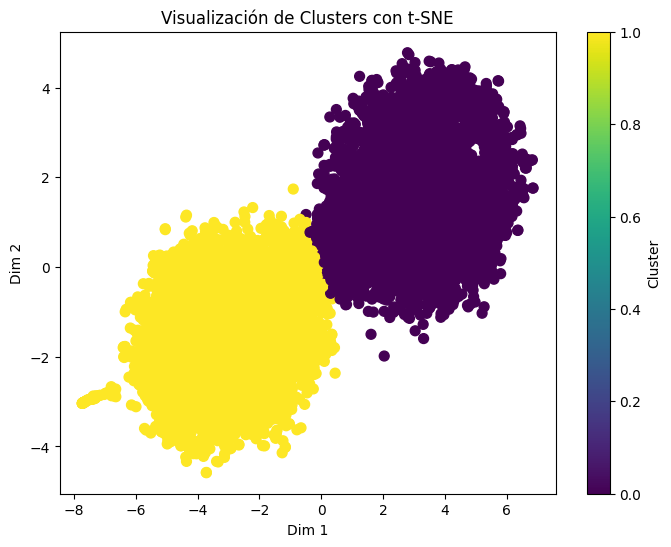

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=train_df['cluster'], cmap='viridis', s=50)
plt.title("Visualización de Clusters con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(label="Cluster")
plt.show()

Se logró una clasificación efectiva entre comentarios positivos y negativos, a continuación profundizaremos más en estos clusters y sus contenidos

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Crear documentos etiquetados
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in enumerate(train_df['text_tokens'])]

# Entrenar el modelo
doc2vec_model = Doc2Vec(
    tagged_data, 
    vector_size=100,
    window=5, 
    min_count=2, 
    epochs=20, 
    dm=1  # Usa PV-DM
)

# Obtener los vectores nuevamente
vectors = [doc2vec_model.infer_vector(tokens) for tokens in train_df['text_tokens']]


In [17]:
from collections import Counter

# Crear un diccionario con palabras por cluster
cluster_words = {cluster: [] for cluster in train_df['cluster'].unique()}
for cluster, tokens in zip(train_df['cluster'], train_df['text_tokens']):
    cluster_words[cluster].extend(tokens)

# Contar palabras por cluster
for cluster, words in cluster_words.items():
    print(f"\nCluster {cluster}:")
    most_common_words = Counter(words).most_common(10)  # Top 10 palabras
    print(most_common_words)


Cluster 1:
[('y', 10141), ('la', 8941), ('el', 7926), ('de', 7832), ('muy', 6924), ('es', 4812), ('en', 4649), ('que', 4142), ('a', 3838), ('con', 2449)]

Cluster 0:
[('la', 9836), ('de', 8293), ('el', 7861), ('y', 7502), ('no', 7202), ('que', 6948), ('en', 5147), ('a', 3690), ('las', 3351), ('me', 2881)]


## Comentarios de cada cluster

In [21]:
### Comentarios positivos del cluster 1

pd.set_option('display.max_colwidth', None)

train_df[train_df['cluster'] == 1]['Comentario'].head(30)

4335                                                                                                                                                                                                                                                                                                                                                        Tuve una excelente experiencia. El hotel está muy bien ubicado y todo fue genial. El primer día que llegué a Bogotá, me sentí mal debido al mal de altura. Sin embargo, recibí unas atenciones excelentes por parte de una de las chicas de recepción. Incluso me preparó un té y estuvo siempre pendiente de cómo me sentía. Realmente me sentí sumamente agradecido por ese gesto tan amable.
353                                                                                                                                                                                                                                                                         

In [22]:
### Comentarios negativos del cluter 0

pd.set_option('display.max_colwidth', None)

train_df[train_df['cluster'] == 0]['Comentario'].head(30)

2865                                                                                                                                                                                                              TODO ES EXCELENTE. HE ESTADO MAS DE 6 VECES EN EL HOTEL Y NO HAY NADA QUE PUEDA DECIR NEGATIVO. EL EQUIPO QUE TRABAJA EN EL HOTEL ES DE PRIMERA. ES COMO LA ESPOSA PERFECTA, NO LA CAMBIAS. GRASIAS
6749                                                 El lugar que publican en Booking no corresponde al real, la habitación que se había seleccionado no correspondía, era una cama doble y me iban a asignar tres camas sencillas. La habitación asignada después no tenía agua la sister a del baño, no se pudo dormir, toda la noche se activaba una máquina que perturbaba el sueño. El desayuno ofrecido pésimo.
9821                                                                                                            Por parte del recepcionista todo muy bien pero la señora que atiende el desa

Podemos ver como el modelo de clasificiación logró clasificar en su mayoría, de forma adecuada tanto comentarios positivos como negativos, incluso en otros idiomas que de alguna forma pasaron el filtro de idioma del preprocesamiento.

## Nube de palabras

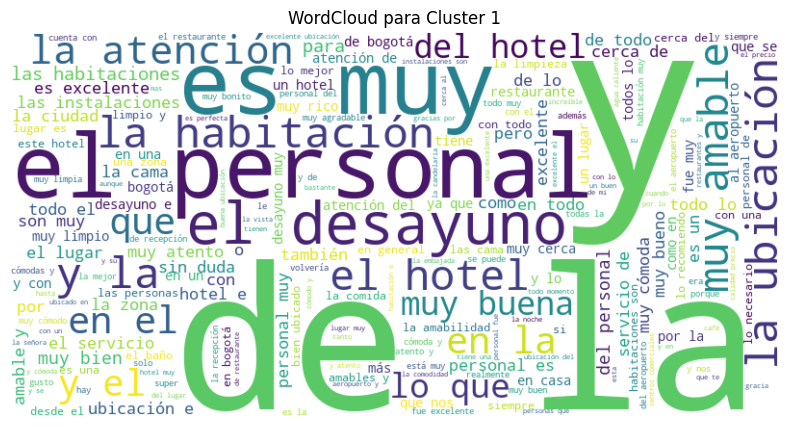

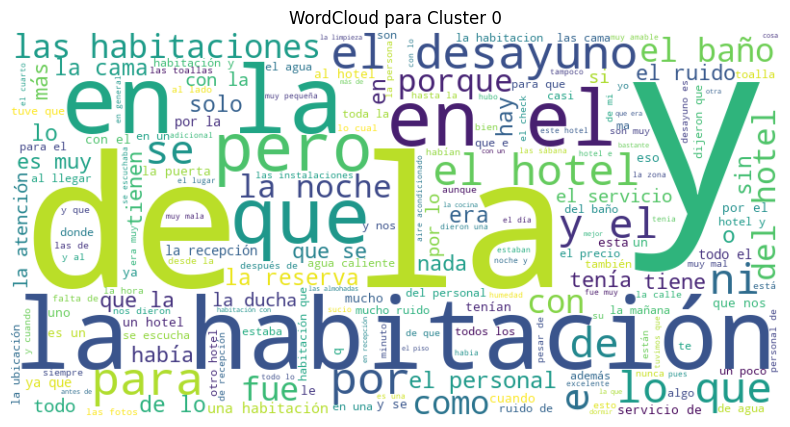

In [18]:
from wordcloud import WordCloud

for cluster in train_df['cluster'].unique():
    cluster_text = " ".join([" ".join(tokens) for tokens in train_df[train_df['cluster'] == cluster]['text_tokens']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud para Cluster {cluster}")
    plt.axis('off')
    plt.show()

Podemos ver que el modelo logró clasificar si el comentario era positivo o negativo, al realizar la nube de palabras no se logra ver con claridad que palabras dan contexto a si el comentario es positivo o negativo, pues en ambas nubes algunas se repiten, si nos fijamos bien en segundo plano las palabras relacionadas con los atributos físicos de lo que compone un buen o mal servicio son clasificados en menor o mayor medida dependiendo de si el comentario es positivo o negativo (habitación, desayuno, atención, personal, etc.)

4335                                                                                                                                                                                                                                                                                                                                                        Tuve una excelente experiencia. El hotel está muy bien ubicado y todo fue genial. El primer día que llegué a Bogotá, me sentí mal debido al mal de altura. Sin embargo, recibí unas atenciones excelentes por parte de una de las chicas de recepción. Incluso me preparó un té y estuvo siempre pendiente de cómo me sentía. Realmente me sentí sumamente agradecido por ese gesto tan amable.
353                                                                                                                                                                                                                                                                         

In [23]:
import numpy as np

# Verificar la forma de los vectores generados
print(f"Cantidad de vectores: {len(vectors)}")
print(f"Dimensionalidad de cada vector: {len(vectors[0])}")

# Mostrar un ejemplo de vector generado
print("Ejemplo de vector:", vectors[0])


Cantidad de vectores: 8597
Dimensionalidad de cada vector: 100
Ejemplo de vector: [-3.98544632e-02  3.15772533e-01 -5.84669888e-01  4.47901338e-01
 -3.10079902e-01 -3.13567638e-01  7.14616179e-02  1.42149761e-01
 -3.88786346e-01 -1.11970767e-01 -6.43344689e-03 -3.67221147e-01
  2.43947476e-01 -7.04223961e-02 -3.02860051e-01 -2.40942776e-01
  4.01676059e-01 -3.62814546e-01 -3.02088428e-02 -4.22104746e-01
  4.81903516e-02 -5.01653016e-01 -3.49423150e-03 -1.61890686e-01
 -6.99423924e-02  2.40119427e-01 -3.70089561e-01  6.37759194e-02
 -2.36473694e-01 -9.89277009e-03  5.43966770e-01  2.05973491e-01
  4.54852395e-02 -3.56606990e-01  1.05770022e-01  3.09290051e-01
  9.36390385e-02 -1.42167017e-01 -1.57478705e-01 -4.79445696e-01
 -2.97469676e-01 -2.07530409e-01 -3.02143432e-02 -1.40785322e-01
  1.84391811e-01 -7.64090270e-02 -5.06402180e-02 -2.84914225e-01
 -2.08662778e-01  2.81852186e-01  1.60824552e-01  4.23396006e-02
 -2.54946411e-01 -3.65937620e-01 -5.12926221e-01  2.67002732e-01
 -1.7484

In [32]:
import numpy as np

# Convertir `vectors` a un array NumPy
vectors_array = np.array(vectors)

# Verificar la forma del array
print(f"Forma de los datos para t-SNE: {vectors_array.shape}")


Forma de los datos para t-SNE: (8597, 100)


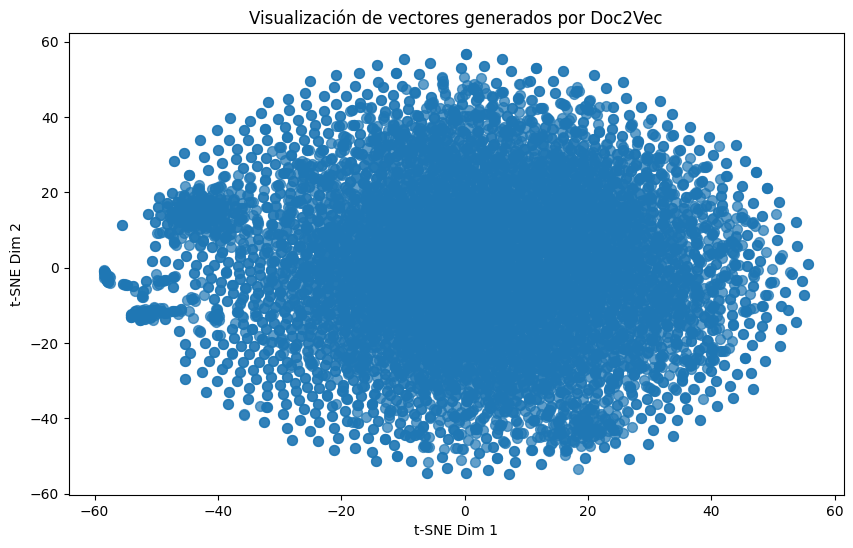

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors_array)

# Visualizar los vectores en 2D
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=50, alpha=0.7)
plt.title("Visualización de vectores generados por Doc2Vec")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


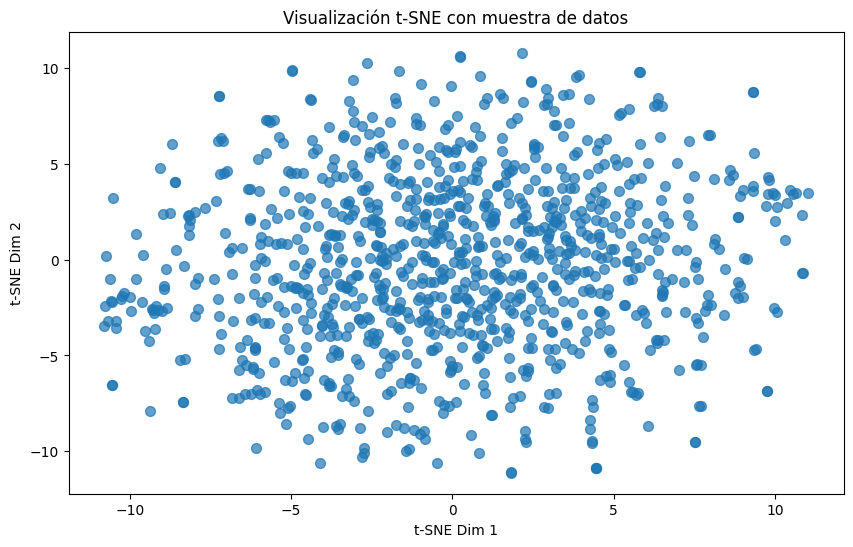

In [35]:
sample_size = 1000  # Cambia según la cantidad de datos
sample_indices = np.random.choice(vectors_array.shape[0], sample_size, replace=False)
sampled_vectors = vectors_array[sample_indices]

# Aplicar t-SNE en la muestra
tsne = TSNE(n_components=2, random_state=42)
vectors_2d_sampled = tsne.fit_transform(sampled_vectors)

# Visualizar los datos muestreados
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d_sampled[:, 0], vectors_2d_sampled[:, 1], s=50, alpha=0.7)
plt.title("Visualización t-SNE con muestra de datos")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


## Por qué a pesar de que los vectores están dispersos uniformemente el modelo logra clasificar bien?

El modelo Doc2Vec no clasifica directamente por temas, sino que genera vectores que capturan las relaciones semánticas y contextuales del texto. En este caso, si los comentarios positivos y negativos terminan en clusters distintos, se debe a que el contexto y las palabras asociadas a cada uno de esos comentarios probablemente tienen características lo suficientemente diferentes para que el K-means los separe.

Por qué ocurre esta separación?

1. Palabras clave frecuentes:
    Los comentarios positivos suelen contener palabras como "bueno", "excelente", "maravilloso", mientras que los negativos podrían incluir términos como "malo", "terrible", "pésimo".
        Doc2Vec considera las palabras y su contexto para generar los vectores. Si las palabras positivas y negativas tienen poca coincidencia en contexto, los vectores serán diferentes.

2. Contexto semántico:
        Doc2Vec también tiene en cuenta cómo las palabras coaparecen en las oraciones. Las palabras relacionadas con emociones positivas y negativas suelen estar asociadas con frases específicas que refuerzan esta distinción.

3. Entrenamiento del modelo Doc2Vec:
        Si los datos utilizados para entrenar el modelo contienen suficientes ejemplos de comentarios positivos y negativos, el modelo aprenderá a distinguirlos. Esto podría explicar por qué los vectores para estos tipos de comentarios terminan en diferentes regiones del espacio vectorial.

Los "temas" en este ejercicio serían si es positivo o es negativo, por eso no hay clasificaciones según habitación, desayuno, ubicación, hotel, etc. El modelo logró entender el contexto de los comentarios basados en las relaciones semánticas entre las palabras. 

In [26]:
# Obtener los documentos más similares al primer comentario
similar_docs = doc2vec_model.docvecs.most_similar(0, topn=5)

# Mostrar resultados
print("Comentarios similares al primer documento:")
for doc_id, similarity in similar_docs:
    print(f"Tweet ID: {doc_id}, Similaridad: {similarity}")
    print("Texto:", " ".join(train_df.iloc[int(doc_id)]['text_tokens']))


Comentarios similares al primer documento:
Tweet ID: 5217, Similaridad: 0.9509705305099487
Texto: tuve una excelente experiencia. el hotel está muy bien ubicado y todo fue genial. el primer día que llegué a bogotá, me sentí mal debido al mal de altura. sin embargo, recibí unas atenciones excelentes por parte de una de las chicas de recepción. incluso me preparó un té y estuvo siempre pendiente de cómo me sentía. realmente me sentí sumamente agradecido por ese gesto tan amable.
Tweet ID: 3868, Similaridad: 0.776699960231781
Texto: excelente hotel. está muy bien ubicado en la zona t que es una zona que se siente bastante segura. tiene cerca un par de centros comerciales y también una zona peatonal muy agradable y con una gran oferta gastronómica. el personal de recepción fue muy amable en todo momento, resolvió nuestras dudas y nos ayudó a programar nuestro transporte hacia el aeropuerto. el personal de limpieza hizo muy bien su trabajo, el hotel lucía muy limpio en todo momento. en gene

C:\Users\Catnip\AppData\Local\Temp\ipykernel_39856\60760720.py:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_docs = doc2vec_model.docvecs.most_similar(0, topn=5)
